# Stock Price Prediction using LSTM

#### Stock Data Collection 

In [20]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv('AAPL.csv')

In [22]:
df.head()

,date,volume,open,close,high,low,adjclose
0,2019-04-18,24195800,203.119995,203.860001,204.149994,202.520004,203.860001
1,2019-04-17,28906800,199.539993,203.130005,203.380005,198.610001,203.130005
2,2019-04-16,25696400,199.460007,199.250000,201.369995,198.559998,199.250000
3,2019-04-15,17536600,198.580002,199.229996,199.850006,198.009995,199.229996
4,2019-04-12,27760700,199.199997,198.869995,200.139999,196.210007,198.869995


In [23]:
df.tail()

,date,volume,open,close,high,low,adjclose
9664,1980-12-18,18362400,0.475446,0.475446,0.477679,0.475446,0.021307
9665,1980-12-17,21610400,0.462054,0.462054,0.464286,0.462054,0.020706
9666,1980-12-16,26432000,0.453125,0.450893,0.453125,0.450893,0.020206
9667,1980-12-15,43971200,0.488839,0.486607,0.488839,0.486607,0.021807
9668,1980-12-12,117258400,0.513393,0.513393,0.515625,0.513393,0.023007


In [24]:
df1=df.reset_index()['high']

In [25]:
df1

0       204.149994
1       203.380005
2       201.369995
3       199.850006
4       200.139999
           ...    
9664      0.477679
9665      0.464286
9666      0.453125
9667      0.488839
9668      0.515625
Name: high, Length: 9669, dtype: float64

In [26]:
df1.shape

(9669,)

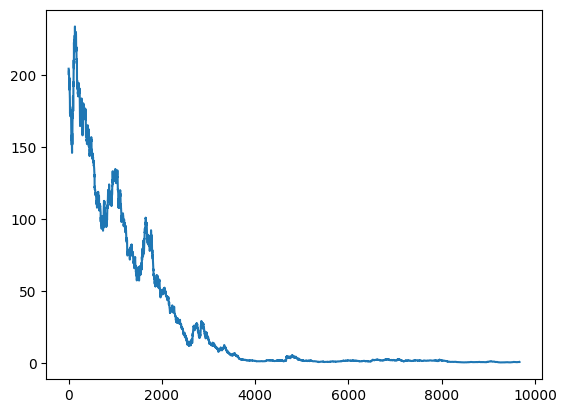

In [27]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
print(df1)

[[0.87430943]
 [0.8710086 ]
 [0.86239199]
 ...
 [0.00109085]
 [0.00124395]
 [0.00135878]]


### Splitting the dataset into train and test split

In [30]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(6284, 3385)

In [32]:
train_data

array([[0.87430943],
       [0.8710086 ],
       [0.86239199],
       ...,
       [0.00412418],
       [0.00416246],
       [0.00431556]])

In [33]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(6183, 100)
(6183,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(3284, 100)
(3284,)


(None, None)

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Creating the stack LSTM Model

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
97/97 [==============================] - 56s 406ms/step - loss: 0.0031 - val_loss: 4.7173e-07
Epoch 2/100
97/97 [==============================] - 35s 358ms/step - loss: 2.1022e-04 - val_loss: 1.0693e-05
Epoch 3/100
97/97 [==============================] - 35s 362ms/step - loss: 1.9140e-04 - val_loss: 2.5766e-07
Epoch 4/100
97/97 [==============================] - 35s 357ms/step - loss: 2.1992e-04 - val_loss: 4.0812e-07
Epoch 5/100
97/97 [==============================] - 35s 357ms/step - loss: 1.9238e-04 - val_loss: 4.6946e-07
Epoch 6/100
97/97 [==============================] - 34s 353ms/step - loss: 1.3641e-04 - val_loss: 1.9679e-07
Epoch 7/100
97/97 [==============================] - 35s 358ms/step - loss: 1.4429e-04 - val_loss: 1.8318e-06
Epoch 8/100
97/97 [==============================] - 34s 355ms/step - loss: 1.3648e-04 - val_loss: 1.6119e-06
Epoch 9/100
97/97 [==============================] - 34s 355ms/step - loss: 1.1867e-04 - val_loss: 4.8800e-07
Epoch 10/100
9

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.13.0'

### Predicting and checking the performance matrics

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

103/103 [==============================] - 6s 61ms/step


#### Transforming to original form

In [49]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#### Calculating performance matrics

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

66.19794965553754

In [51]:
math.sqrt(mean_squared_error(ytest,test_predict))

1.0333740344709557

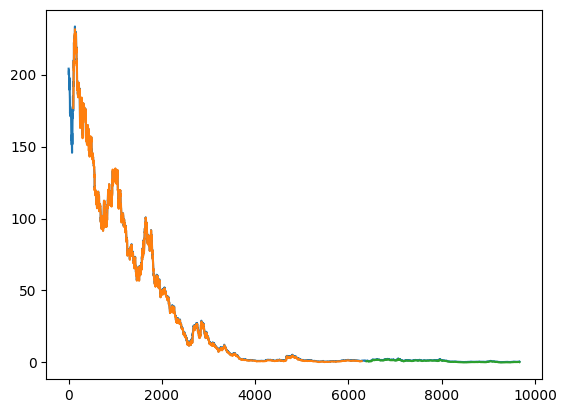

In [52]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [53]:
len(test_data)

3385

In [54]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 3044)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
temp_input

[0.008296209113261142,
 0.008334484442538509,
 0.008411036123158699,
 0.0085258621109908,
 0.008334484442538509,
 0.00821965845470641,
 0.007951730127699385,
 0.007875179469144651,
 0.007875179469144651,
 0.007990005456976751,
 0.008066556115531484,
 0.00797086728130534,
 0.008028280786254118,
 0.008143107796151674,
 0.007990005456976751,
 0.007951730127699385,
 0.00797086728130534,
 0.008104831444808851,
 0.008181383125429043,
 0.007951730127699385,
 0.007913454798422018,
 0.007913454798422018,
 0.007951730127699385,
 0.007875179469144651,
 0.008143107796151674,
 0.008257933783983776,
 0.008066556115531484,
 0.007951730127699385,
 0.007990005456976751,
 0.007913454798422018,
 0.007951730127699385,
 0.008066556115531484,
 0.007798627788524461,
 0.007722077129969728,
 0.007798627788524461,
 0.007568975301827531,
 0.007224495805233045,
 0.007186220475955679,
 0.007224495805233045,
 0.007339322304097875,
 0.0074158734736853365,
 0.007224495805233045,
 0.007186220475955679,
 0.007033118647

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
len(df1)

9669

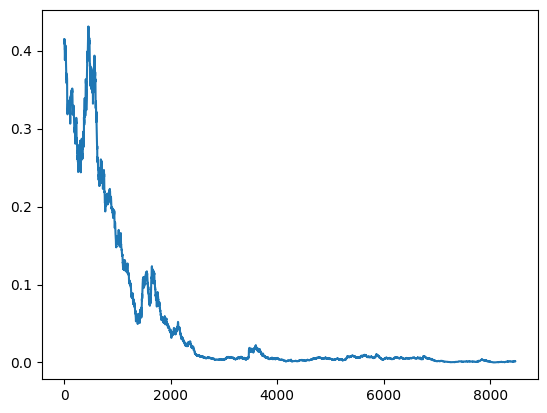

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()

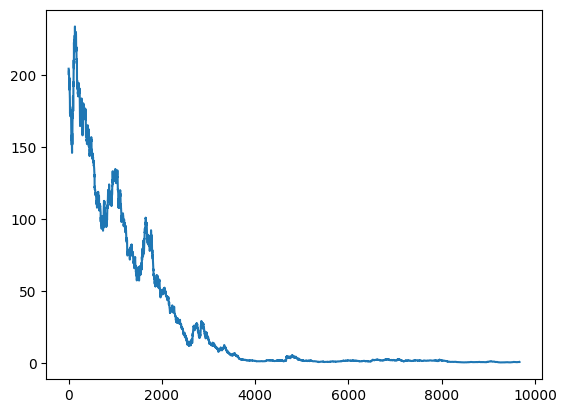

In [66]:
plt.plot(df3)